# Data Analysis based on Flowers102 Database

In this project, we are using 2 datasets for reference which are CelebA and Flowers102. For the dataset CelebA, in the time that we download it, it needs a permission, so we analyze the dataset Flowers102.

## Import Packages

In [85]:
from torchvision.datasets import CelebA, Flowers102
import torch
import json
import matplotlib.pyplot as plt

In [86]:
# Transform
import torchvision.transforms as transforms
from torchvision.transforms import v2
import torch.nn.functional as F

## Download Dataset

Flowers102 dataset can be achieved by torch dataset, and it has option to split dataset into train and validation set. In latter, we will see how many images and labels we have in each class.

In [87]:
def flowers102_transform():
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to a common size (adjust as needed)
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally for data augmentation
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # ImageNet mean and standard deviation
    ])
    target_transform = None  # You can define a target transform if needed
    return transform, target_transform

def flowers102_transform_v2():
    transforms_v2 = v2.Compose([
        v2.ToTensor(),
        v2.Resize((128, 128)),
        v2.RandomResizedCrop(size=(128, 128), antialias=True),
        v2.RandomHorizontalFlip(p=0.5),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    target_transform = None

    return transforms_v2, target_transform

In [88]:
root_data_path = '/content/'

transform, target_transform = flowers102_transform_v2()

train_dataset = Flowers102(root=root_data_path, split='train',
                                   transform=transform, target_transform=target_transform, download=True)

val_dataset = Flowers102(root=root_data_path, split='val',
                            transform=transform, download=False)

original_dataset = Flowers102(root=root_data_path, split='train',
                                   transform=v2.ToTensor(), target_transform=target_transform, download=True)

Due to the unavability of label names, so we copied it from internet in order to visualize it.

In [89]:
# https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

label_names = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose",
               "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower",
               "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger",
               "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily",
               "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle",
               "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris",
               "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan",
               "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort",
               "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower",
               "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose",
               "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian",
               "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup",
               "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania",
               "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
               "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
               "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea",
               "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff",
               "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy",
               "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen",
               "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower",
               "77": "passion flower", "51": "petunia"}


In [90]:
label_names.keys()

dict_keys(['21', '3', '45', '1', '34', '27', '7', '16', '25', '26', '79', '39', '24', '67', '35', '32', '10', '6', '93', '33', '9', '102', '14', '19', '100', '13', '49', '15', '61', '31', '64', '68', '63', '69', '62', '20', '38', '4', '86', '101', '42', '22', '2', '54', '66', '70', '85', '99', '87', '5', '92', '28', '97', '57', '40', '47', '59', '48', '55', '36', '91', '29', '71', '90', '18', '98', '8', '30', '17', '52', '84', '12', '11', '96', '23', '50', '44', '53', '72', '65', '80', '76', '37', '56', '60', '82', '58', '75', '41', '95', '43', '83', '78', '88', '94', '81', '74', '89', '73', '46', '77', '51'])

In [91]:
label_names['10']

'globe thistle'

## Visualization of original dataset and augmented dataset

In [92]:
def visualize_data(data_type='original'):
    # Calculate the number of rows and columns for the grid
    num_images = 16
    cols = 4
    rows = (num_images + cols - 1) // cols

    # Create a figure to display images
    figure = plt.figure(figsize=(8, 8))

    for i in range(1, num_images + 1):

        if data_type == 'original':
            sample_idx = torch.randint(len(original_dataset), size=(1,)).item()
            img, label = original_dataset[sample_idx]
        else:
            sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
            img, label = train_dataset[sample_idx]
        # print(img)
        if str(label) in label_names:
            figure.add_subplot(rows, cols, i)
            plt.title(label_names[str(label)])
            plt.axis("off")

            plt.imshow(img.permute(1, 2, 0))

    plt.savefig(f"{num_images}_sample_images_{data_type}.png")

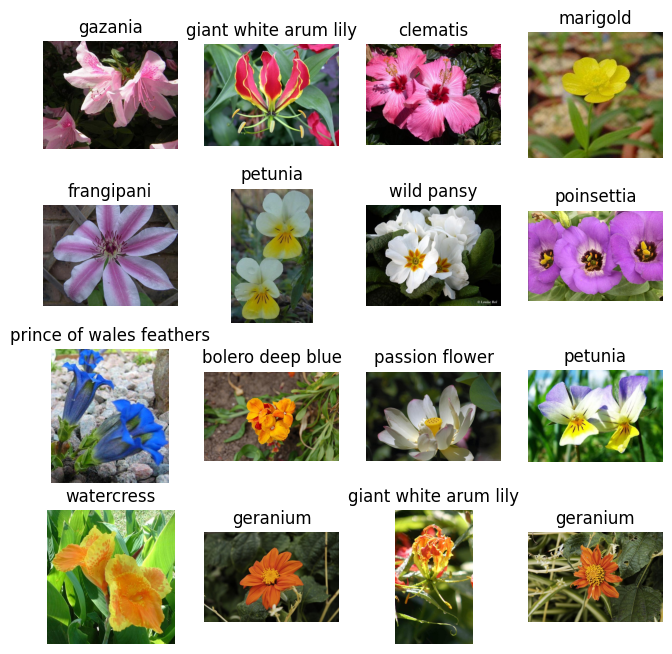

In [93]:
# show original dataset
visualize_data('original')

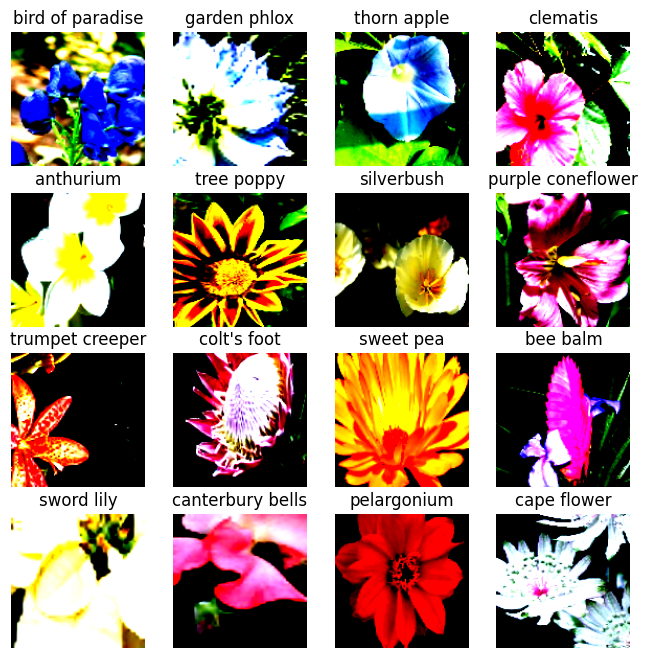

In [94]:
# show augmented dataset
visualize_data('augmentated')

## Check the balance of the dataset

In [95]:
def check_dataset_balance(dataset):
    labels = []
    for image, label in dataset:
        labels.append(label)

    distribution_labels = torch.bincount(torch.tensor(labels))

    return distribution_labels

print("number of images in each class in train dataset\n",check_dataset_balance(train_dataset))
print(" ")
print("number of images in each class in validation dataset \n",check_dataset_balance(val_dataset))

number of images in each class in train dataset
 tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
 
number of images in each class in validation dataset 
 tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 1

In [96]:
len(train_dataset), len(val_dataset)

(1020, 1020)

Training a deep learning model on a dataset with only 10 images per class can be challenging due to the limited amount of data available. However, there are several strategies we can consider to make the most of your small dataset:


*   Transfer learning
*   Data Augementation
*   Likelihood Matching: Use techniques like likelihood matching or contrastive divergence to match the likelihood of the data distribution. These techniques can stabilize training and help with small datasets.
*   Use simple models






# Prepare data for training

For the diffusion process, we do not really need the labels. Instead, the common loss is negative log-likelihood function to measure the discrepancy between 2 distributions.

$P(x|μ,σ^2) = ∏_{n=1}^{N}𝒩(x_{n}|μ,σ^2)$

Loga both side and suppose we use normal distribution:

$Log(P(x|μ,σ^2)) = log(∏_{n=1}^{N}𝒩(x_{n}|μ,σ^2))$

\begin{align*}
\text{NLL} &= -\log \left( \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} \right) \\
&= -\sum_{i=1}^{n} \left( \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \frac{(x_i - \mu)^2}{2\sigma^2} \right) \\
&= -\sum_{i=1}^{n} \left( \frac{1}{2}\log(2\pi\sigma^2) + \frac{(x_i - \mu)^2}{2\sigma^2} \right) \\
&= \frac{n}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
\end{align*}

In each step, we need to add noise (supposed Gaussian) to the images and then denoise it iteratively. The key idea is to estimate the parameters μ and σ. So the data is already defined at the beggining

In [97]:
# train dataset: train_dataset
# validation dataset: val_dataset

The input to the model now is the noisy batch, so we first need to define which schedule we use to add the noise. Here the author stated that cosine schedule is the best suited.

In [98]:
def cosine_beta_schedule(timesteps, s=0.008):
    """
    cosine schedule as proposed in https://arxiv.org/abs/2102.09672
    """
    steps = timesteps + 1
    x = torch.linspace(0, timesteps, steps)
    alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * torch.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, 0.0001, 0.9999)

In [99]:
timesteps = 300

# define beta schedule
betas = cosine_beta_schedule(timesteps=timesteps)

# define alphas
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)

# calculations for diffusion q(x_t | x_{t-1}) and others
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)

# calculations for posterior q(x_{t-1} | x_t, x_0)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

def extract(a, t, x_shape):
    batch_size = t.shape[0]
    out = a.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

In [100]:
betas

tensor([1.5640e-04, 2.1058e-04, 2.6447e-04, 3.1835e-04, 3.7247e-04, 4.2647e-04,
        4.8053e-04, 5.3447e-04, 5.8872e-04, 6.4272e-04, 6.9708e-04, 7.5114e-04,
        8.0526e-04, 8.5956e-04, 9.1404e-04, 9.6828e-04, 1.0227e-03, 1.0772e-03,
        1.1316e-03, 1.1863e-03, 1.2408e-03, 1.2955e-03, 1.3503e-03, 1.4052e-03,
        1.4601e-03, 1.5152e-03, 1.5702e-03, 1.6252e-03, 1.6806e-03, 1.7360e-03,
        1.7913e-03, 1.8469e-03, 1.9025e-03, 1.9581e-03, 2.0140e-03, 2.0699e-03,
        2.1260e-03, 2.1822e-03, 2.2384e-03, 2.2949e-03, 2.3515e-03, 2.4081e-03,
        2.4649e-03, 2.5218e-03, 2.5789e-03, 2.6361e-03, 2.6935e-03, 2.7510e-03,
        2.8087e-03, 2.8666e-03, 2.9244e-03, 2.9827e-03, 3.0409e-03, 3.0995e-03,
        3.1584e-03, 3.2170e-03, 3.2762e-03, 3.3353e-03, 3.3949e-03, 3.4545e-03,
        3.5143e-03, 3.5744e-03, 3.6346e-03, 3.6952e-03, 3.7558e-03, 3.8168e-03,
        3.8779e-03, 3.9393e-03, 4.0010e-03, 4.0628e-03, 4.1251e-03, 4.1873e-03,
        4.2500e-03, 4.3128e-03, 4.3761e-

In [101]:
example_image, example_label = next(iter(original_dataset))

In [102]:
start_image = example_image.unsqueeze(dim=0)

In [103]:
import numpy as np

reverse_transform = v2.Compose([
     v2.Lambda(lambda t: (t + 1) / 2),
     v2.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     v2.Lambda(lambda t: t * 255.),
     v2.Lambda(lambda t: t.numpy().astype(np.uint8)),
     v2.ToPILImage(),
])

reverse_image = reverse_transform(start_image.squeeze())

In [104]:
# Forward diffusion process
def q_sample(x_start, t, noise=None):
    if noise is None:
        noise = torch.randn_like(x_start)

    sqrt_alphas_cumprod_t = extract(sqrt_alphas_cumprod, t, x_start.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(
        sqrt_one_minus_alphas_cumprod, t, x_start.shape
    )

    return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise

In [105]:
def get_noisy_image(x_start, t):
    # add noise
    x_noisy = q_sample(x_start, t=t)

    # turn back into PIL image
    noisy_image = reverse_transform(x_noisy.squeeze())

    return noisy_image

noisy_image = get_noisy_image(start_image, t=torch.tensor([40]))

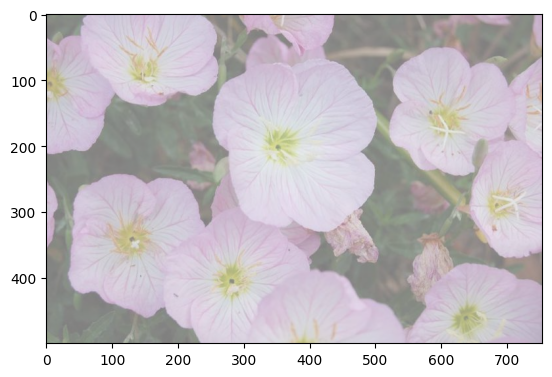

In [106]:
# Original Image
plt.imshow(reverse_image)

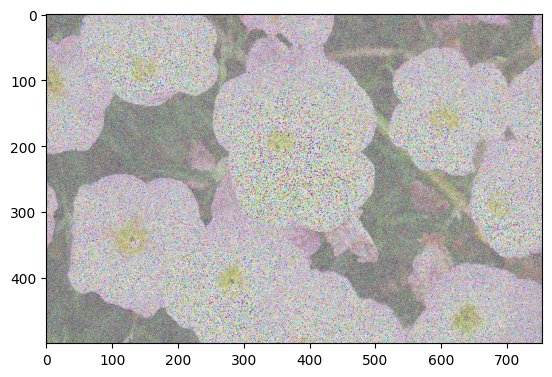

In [107]:
# Noisy image
plt.imshow(noisy_image)

So the target is the noisy image and input image is the original image shown above. From that, we can define the objective function is as follow:

$||ϵ - ϵ_0(x,t)||^2$ in which ϵ is the noisy image and $ϵ_0(x,t)$ is our results from neuron network.